In [1]:
import matplotlib.pyplot as plt
import numpy as np
from read_dat import *
from scipy.optimize import curve_fit

def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))

In [2]:
start = -80
long = 520
short = 30

calibration = [0.00007280833261560682, 0.02366570282243352]

dat_file = read_dat('EJ276_50x50_Data/AmBe.dat', align_method='CFD', t_start=start, t_long=long, t_short=short, calibration_m=calibration[0], calibration_c=calibration[1])

init complete


In [4]:
ev = dat_file.read_event()

trace = ev[0].get_trace()

times = ev[0].get_times()

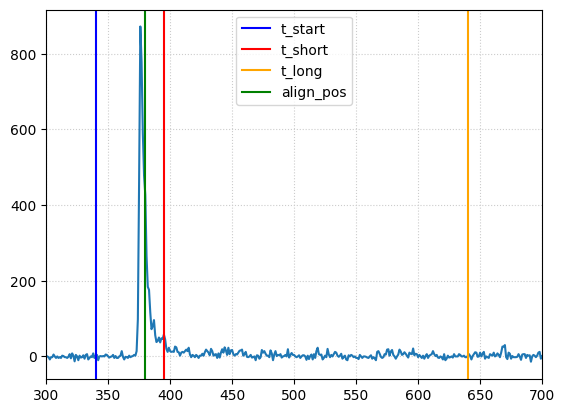

In [18]:
ev = dat_file.read_event()

trace = ev[0].get_trace()

times = ev[0].get_times()


plt.figure()

plt.plot(trace)
plt.axvline(times[0], label='t_start', color='b')
plt.axvline(times[1], label='t_short', color='r')
plt.axvline(times[2], label='t_long', color='orange')
plt.axvline(times[3], label='align_pos', color='green')

plt.legend()
plt.xlim(300, 700)
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [4]:
short_tests = [5, 10, 15, 20, 30, 40]
long_tests = [100, 200, 300, 400, 500, 600]


In [52]:


dat_file.lst_out(500000, ch=[0], output=[[1,1,0,0,0]], filename=f'EJ276_50x50_Data/AmBe_Test_out_old.csv', integrals=[-80, 10, 400])

dat_file.lst_out(500000, ch=[0], output=[[1,1,0,0,0]], filename=f'EJ276_50x50_Data/AmBe_Test_out_new.csv', integrals=[-80, 30, 520])



1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
13000 events
14000 events
15000 events
16000 events
17000 events
18000 events
19000 events
20000 events
21000 events
22000 events
23000 events
24000 events
25000 events
26000 events
27000 events
28000 events
29000 events
30000 events
31000 events
32000 events
33000 events
34000 events
35000 events
36000 events
37000 events
38000 events
39000 events
40000 events
41000 events
42000 events
43000 events
44000 events
45000 events
46000 events
47000 events
48000 events
49000 events
50000 events
51000 events
52000 events
53000 events
54000 events
55000 events
56000 events
57000 events
58000 events
59000 events
60000 events
61000 events
62000 events
63000 events
64000 events
65000 events
66000 events
67000 events
68000 events
69000 events
70000 events
71000 events
72000 events
73000 events
74000 events
75000 events
76000 events
77000 events
78000 ev

In [53]:
file = open(f'EJ276_50x50_Data/AmBe_Test_out_old.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

old_L = []
old_S = []

for row in reader:
    old_L.append(float(row[0]))
    old_S.append(float(row[1]))

old_L = np.array(old_L)
old_S = np.array(old_S)
file.close()

file = open(f'EJ276_50x50_Data/AmBe_Test_out_new.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

new_L = []
new_S = []

for row in reader:
    new_L.append(float(row[0]))
    new_S.append(float(row[1]))

new_L = np.array(new_L)
new_S = np.array(new_S)
file.close()

['EJ276_50x50_Data/AmBe channel 0, 500000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 500000 events, cuts False']
['L [ch]', 'S[ch]']


In [59]:
%matplotlib tk
plt.figure()
plt.hist2d(old_L, old_S, [256,256], norm=colors.LogNorm(vmin=1))
plt.xlabel('L (MeVee)')
plt.ylabel('S')
plt.ylim(0.2,1)
plt.xlim(0,13)
plt.colorbar(label='Counts')
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [76]:
plt.figure()
plt.hist2d(new_L, new_S, [256,256], norm=colors.LogNorm(vmin=1))
plt.xlabel('L (MeVee)')
plt.ylabel('S')
plt.ylim(0.2,1)
plt.xlim(0,13)
plt.colorbar(label='Counts')
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [77]:
old_L_split = old_L[(old_L >= 3) & (old_L <= 4)]
old_S_split = old_S[(old_L >= 3) & (old_L <= 4)]

old_L_split_gammas = old_L_split[old_S_split > 0.78]
old_S_split_gammas = old_S_split[old_S_split > 0.78]

old_L_split_neutron = old_L_split[old_S_split < 0.78]
old_S_split_neutron = old_S_split[old_S_split < 0.78]

old_gamma_hist = np.histogram(old_S_split_gammas, bins='auto')
old_neutron_hist = np.histogram(old_S_split_neutron, bins='auto')

gamma_popt, gamma_pcov = curve_fit(gaussian, old_gamma_hist[1][:-1], old_gamma_hist[0])
neutron_popt, neutron_pcov = curve_fit(gaussian, old_neutron_hist[1][:-1], old_neutron_hist[0])

print(np.abs(gamma_popt[0] - neutron_popt[0]) / (2.35 * np.abs(gamma_popt[1]) + 2.35 * np.abs(neutron_popt[1])))

plt.figure()

plt.step(old_gamma_hist[1][:-1], old_gamma_hist[0])
plt.step(old_neutron_hist[1][:-1], old_neutron_hist[0])

plt.plot(old_gamma_hist[1][:-1], gaussian(old_gamma_hist[1][:-1], *gamma_popt))
plt.plot(old_neutron_hist[1][:-1], gaussian(old_neutron_hist[1][:-1], *neutron_popt))

plt.xlabel('')
plt.ylabel('')
# plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.3147604268795703


In [78]:
new_L_split = new_L[(new_L >= 3) & (new_L <= 4)]
new_S_split = new_S[(new_L >= 3) & (new_L <= 4)]

new_L_split_gammas = new_L_split[new_S_split > 0.78]
new_S_split_gammas = new_S_split[new_S_split > 0.78]

new_L_split_neutron = new_L_split[new_S_split < 0.78]
new_S_split_neutron = new_S_split[new_S_split < 0.78]

new_gamma_hist = np.histogram(new_S_split_gammas, bins='auto')
new_neutron_hist = np.histogram(new_S_split_neutron, bins='auto')

gamma_popt_new, gamma_pcov = curve_fit(gaussian, new_gamma_hist[1][:-1], new_gamma_hist[0])
neutron_popt_new, neutron_pcov = curve_fit(gaussian, new_neutron_hist[1][:-1], new_neutron_hist[0])

print(np.abs(gamma_popt_new[0] - neutron_popt_new[0]) / (2.35 * np.abs(gamma_popt_new[1]) + 2.35 * np.abs(neutron_popt_new[1])))

plt.figure()

plt.step(new_gamma_hist[1][:-1], new_gamma_hist[0])
plt.step(new_neutron_hist[1][:-1], new_neutron_hist[0])

plt.plot(new_gamma_hist[1][:-1], gaussian(new_gamma_hist[1][:-1], *gamma_popt_new))
plt.plot(new_neutron_hist[1][:-1], gaussian(new_neutron_hist[1][:-1], *neutron_popt_new))

plt.xlabel('')
plt.ylabel('')
# plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.330119266564585


In [5]:
%matplotlib tk

for i in long_tests:
    file = open(f'./EJ276_50x50_Data/AmBe_Test_out_{i}.csv', 'r')

    reader = csv.reader(file)

    head = next(reader, None)
    print(head)
    head = next(reader, None)
    print(head)

    L = []
    S = []

    for row in reader:
        L.append(float(row[0]))
        S.append(float(row[1]))

    L = np.array(L)
    S = np.array(S)

    dat_file.add_selections(L, S, mode='m', lims=[[0,8], [0,1.2]])


for j in long_tests:
    file = open(f'./EJ276_50x50_Data/AmBe_Test_out_{j}.csv', 'r')

    reader = csv.reader(file)

    head = next(reader, None)
    print(head)
    head = next(reader, None)
    print(head)

    L = []
    S = []

    for row in reader:
        L.append(float(row[0]))
        S.append(float(row[1]))

    L = np.array(L)
    S = np.array(S)

    dat_file.add_selections(L, S, mode='m', lims=[[0,8], [0,1.2]])


['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
Begin selection for cut 1
1.0887096774193545 0.7699330972058244
2.0026881720430105 0.7841007477371112
3.6088709677419346 0.7872491145218417
5.551075268817204 0.7982683982683981
7.9502688172043 0.8061393152302242
7.936827956989246 0.008028335301062589
0.06048387096774177 0.014325068870523427
0.04704301075268802 0.5511216056670601
0.14784946236559127 0.6597402597402596
0.221774193548387 0.7164108618654073
0.389784946236559 0.7415977961432506
0.7526881720430105 0.7589138134592679
0.9946236559139785 0.7683589138134591
End selection
Selections outputted to file: EJ276_50x50_Data/AmBe_cuts.csv
Polygons Created
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
Begin selection for cut 2
0.16129032258064502 0.6754820936639118
0.38306451612903203 0.7400236127508854
0.8266129032258065 0.7715072805981895
1.5927419354838706 0.782526564344746
2.8494623655913975 0.7872491145218417
4.29435

In [56]:
from FoM import FoM

In [25]:
short_FoMs = []
long_FoMs = []

for count, len in enumerate(short_tests):
    file = open(f'./EJ276_50x50_Data/AmBe_Test_out_{len}.csv', 'r')

    reader = csv.reader(file)

    head = next(reader, None)
    print(head)
    head = next(reader, None)
    print(head)

    L = []
    S = []

    for row in reader:
        L.append(float(row[0]))
        S.append(float(row[1]))

    L = np.array(L)
    S = np.array(S)

    neutron_L, neutron_S = dat_file.select_events(L, S, cut_id=[count], inc=[1])
    gamma_L, gamma_S = dat_file.select_events(L, S, cut_id=[count], inc=[-1])

    FoMs, FoM_edges = FoM(L, S, neutron_L, neutron_S, gamma_L, gamma_S, 0.2, 200, 4)

    short_FoMs.append([FoMs, FoM_edges])

for count, len in enumerate(long_tests):
    file = open(f'./EJ276_50x50_Data/AmBe_Test_out_{len}.csv', 'r')

    reader = csv.reader(file)

    head = next(reader, None)
    print(head)
    head = next(reader, None)
    print(head)

    L = []
    S = []

    for row in reader:
        L.append(float(row[0]))
        S.append(float(row[1]))

    L = np.array(L)
    S = np.array(S)

    neutron_L, neutron_S = dat_file.select_events(L, S, cut_id=[count+6], inc=[1])
    gamma_L, gamma_S = dat_file.select_events(L, S, cut_id=[count+6], inc=[-1])

    FoMs, FoM_edges = FoM(L, S, neutron_L, neutron_S, gamma_L, gamma_S, 0.2, 200, 4)

    long_FoMs.append([FoMs, FoM_edges])


['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']


In [26]:
plt.figure()

plt.scatter(short_FoMs[0][1][:-1], short_FoMs[0][0], label='0')
plt.scatter(short_FoMs[1][1][:-1], short_FoMs[1][0], label='1')
plt.scatter(short_FoMs[2][1][:-1], short_FoMs[2][0], label='2')
plt.scatter(short_FoMs[3][1][:-1], short_FoMs[3][0], label='3')
plt.scatter(short_FoMs[4][1][:-1], short_FoMs[4][0], label='4')
plt.scatter(short_FoMs[5][1][:-1], short_FoMs[5][0], label='5')

plt.xlabel('')
plt.ylabel('')
plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [27]:
plt.figure()

plt.scatter(long_FoMs[0][1][:-1], long_FoMs[0][0], label='0')
plt.scatter(long_FoMs[1][1][:-1], long_FoMs[1][0], label='1')
plt.scatter(long_FoMs[2][1][:-1], long_FoMs[2][0], label='2')
plt.scatter(long_FoMs[3][1][:-1], long_FoMs[3][0], label='3')
plt.scatter(long_FoMs[4][1][:-1], long_FoMs[4][0], label='4')
plt.scatter(long_FoMs[5][1][:-1], long_FoMs[5][0], label='5')

plt.xlabel('')
plt.ylabel('')
plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [3]:
dat_file.lst_out(10000, ch=[0], output=[[1,1,0,0,0]], filename=f'EJ276_50x50_Data/test_out.csv')

/home/mkidson/gitRepos/dDAQ_dev/EJ276_calibration_testing/read_dat.py:120: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "lst_out" failed type inference due to: Untyped global name 'open': Cannot determine Numba type of <class 'builtin_function_or_method'>

File "read_dat.py", line 205:
    def lst_out(self, events=False, ch=True, output=True, traces=False, cuts=False, inc=None, filename="", align_method_lst_out=None, align_args_lst_out=None, integrals=None):
        <source elided>
                if len(filename)==0:
                    f = open(f'{self.fileName[:-4]}_params_{ch[i]}.csv', 'w', newline='')
                    ^

  @jit


ValueError: Failed in object mode pipeline (step: object mode frontend)
too many values to unpack (expected 1)

In [5]:
file = open(f'./EJ276_50x50_Data/AmBe_out_for_cuts.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

L = []
S = []

for row in reader:
    L.append(float(row[0]))
    S.append(float(row[1]))

L = np.array(L)
S = np.array(S)

['EJ276_50x50_Data/AmBe channel 0, 100000 events, cuts False']
['L [ch]', 'S[ch]']


In [4]:
# %matplotlib tk
# dat_file.add_selections(L, S, mode='m', lims=[[0,8], [0,1.2]])
dat_file.add_selections(mode='p', file='./EJ276_50x50_Data/AmBe_cuts.csv')

Selections Imported
Polygons Created


In [5]:
dat_file.lst_out(False, output=[[1,1,0,0,0]], cuts=[0], inc=[-1], filename='AmBe_gamma_out.csv')

1000 events
1000 events
1000 events
2000 events
2000 events
3000 events
3000 events
4000 events
4000 events
4000 events
4000 events
4000 events
4000 events
5000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
12000 events
12000 events
13000 events
13000 events
13000 events
13000 events
14000 events
14000 events
15000 events
16000 events
17000 events
18000 events
18000 events
19000 events
20000 events
21000 events
22000 events
23000 events
24000 events
24000 events
24000 events
25000 events
26000 events
27000 events
28000 events
29000 events
30000 events
30000 events
31000 events
32000 events
32000 events
33000 events
33000 events
34000 events
35000 events
36000 events
37000 events
37000 events
38000 events
38000 events
38000 events
38000 events
38000 events
38000 events
39000 events
40000 events
40000 events
40000 events
41000 events
41000 events
41000 events
42000 events
43000 events
43000 events
44000 events
45000 events
45000

In [4]:
file = open(f'AmBe_neutron_out.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

neutron_L = []
neutron_S = []

for row in reader:
    neutron_L.append(float(row[0]))
    neutron_S.append(float(row[1]))

neutron_L = np.array(neutron_L)
neutron_S = np.array(neutron_S)

['EJ276_50x50_Data/AmBe channel 0, False events, cuts [0]']
['L [ch]', 'S[ch]']


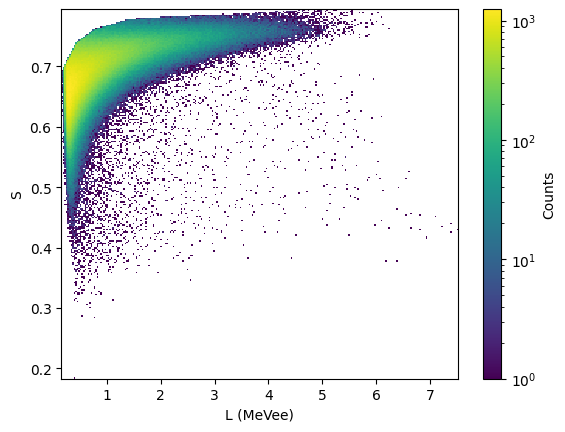

In [6]:
plt.hist2d(neutron_L, neutron_S, [256,256], norm=colors.LogNorm(vmin=1))
plt.xlabel('L (MeVee)')
plt.ylabel('S')
plt.colorbar(label='Counts')
plt.show()

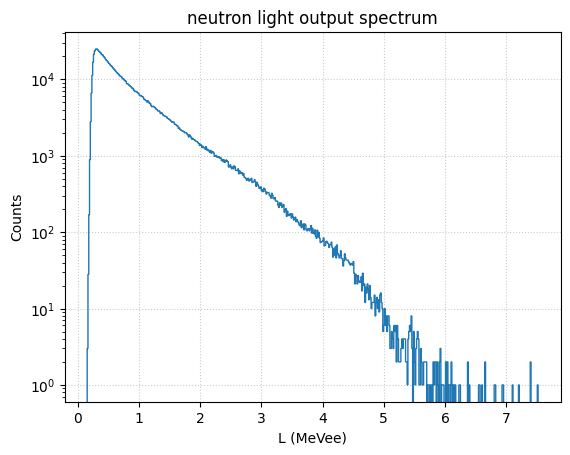

In [42]:
plt.figure()

plt.hist(neutron_L, bins='auto', histtype='step')

plt.xlabel('L (MeVee)')
plt.ylabel('Counts')
plt.yscale('log')

plt.title('neutron light output spectrum')
# plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [10]:
file = open(f'AmBe_gamma_out.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

gamma_L = []
gamma_S = []

for row in reader:
    gamma_L.append(float(row[0]))
    gamma_S.append(float(row[1]))

gamma_L = np.array(gamma_L)
gamma_S = np.array(gamma_S)

['EJ276_50x50_Data/AmBe channel 0, False events, cuts [0]']
['L [ch]', 'S[ch]']


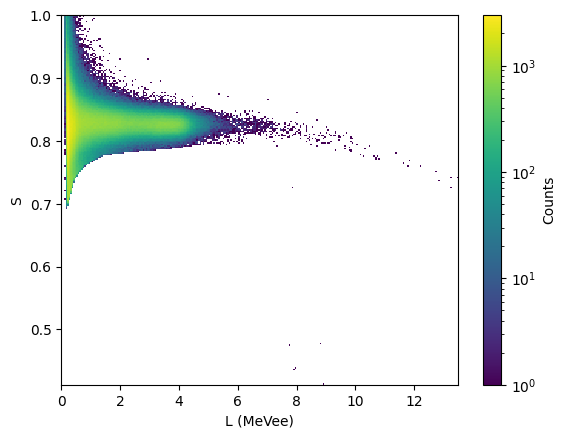

In [13]:
plt.hist2d(gamma_L, gamma_S, [256,256], norm=colors.LogNorm(vmin=1))
plt.xlabel('L (MeVee)')
plt.ylabel('S')
plt.colorbar(label='Counts')
plt.xlim(left=0)
plt.ylim(top=1)
plt.show()

In [17]:
from FoM import FoM

L = np.concatenate((neutron_L, gamma_L))
S = np.concatenate((neutron_S, gamma_S))

FoMs, FoM_edges = FoM(L, S, neutron_L, neutron_S, gamma_L, gamma_S, 0.2, 200, 6)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


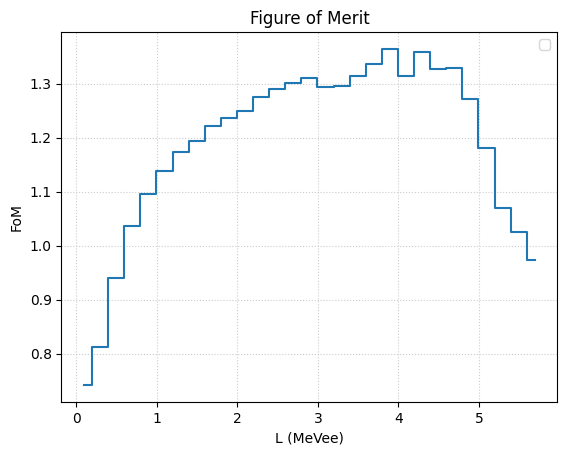

In [20]:
plt.figure()

plt.step(FoM_edges[:-1], FoMs, where='mid')

plt.xlabel('L (MeVee)')
plt.ylabel('FoM')
# plt.yscale('log')

plt.title('Figure of Merit')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

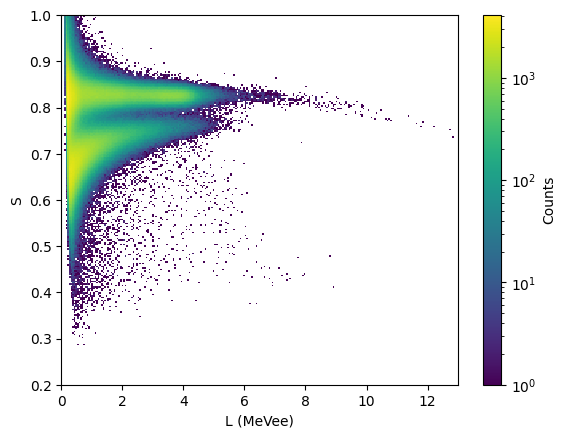

In [21]:
plt.figure()
plt.hist2d(L, S, [256,256], norm=colors.LogNorm(vmin=1))
plt.xlabel('L (MeVee)')
plt.ylabel('S')
plt.ylim(0.2,1)
plt.xlim(0,13)
plt.colorbar(label='Counts')
plt.show()

In [29]:
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit


def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


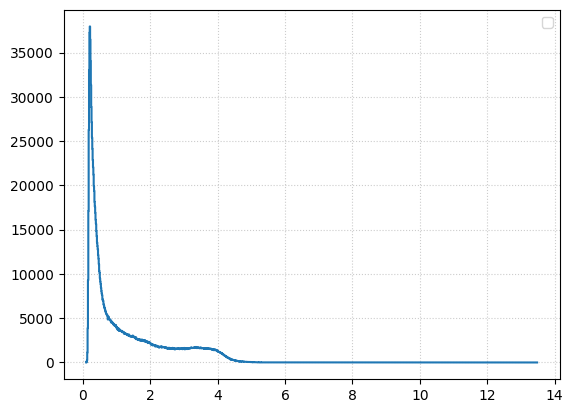

In [30]:
gamma_L_hist = np.histogram(gamma_L, bins='sqrt')
plt.figure()

plt.step(gamma_L_hist[1][:-1], gamma_L_hist[0])

plt.xlabel('')
plt.ylabel('')
# plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [44]:
print(np.min(gamma_L))

0.09523629378358138


[  4.18393816   0.23317879 -16.17395211]


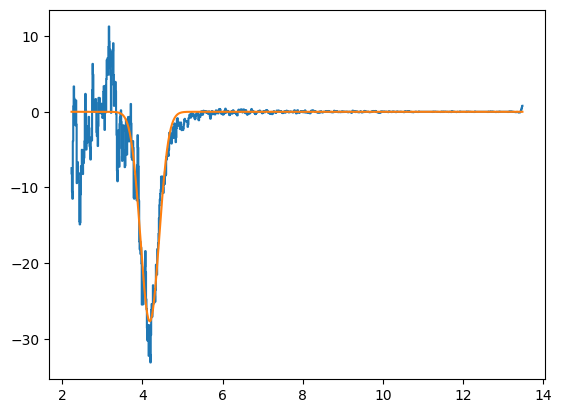

In [34]:
grad = savgol_filter(np.gradient(gamma_L_hist[0]), 20, 3)
# grad = np.gradient(hist[0])

popt, pcov = curve_fit(gaussian, gamma_L_hist[1][200:-1], grad[200:], [4,1,-1])

print(popt)

plt.figure()
plt.step(gamma_L_hist[1][200:-1], grad[200:])
plt.plot(gamma_L_hist[1][200:-1], gaussian(gamma_L_hist[1][200:-1], *popt))

plt.show()